<a href="https://colab.research.google.com/github/quangphuc2509/AI-Homework/blob/main/FashionMist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(10000, 28, 28)
(10000,)
(60000, 28, 28)
(60000,)


In [2]:
class_name=['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandel','Shirt','Sneaker','Bag','Angleboot']

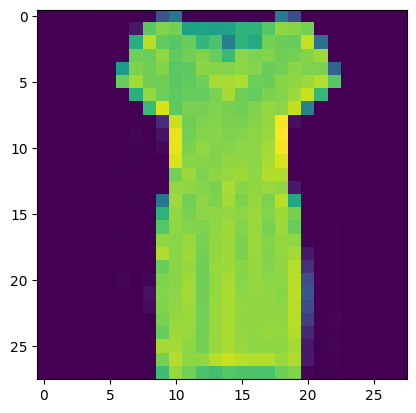

Dress


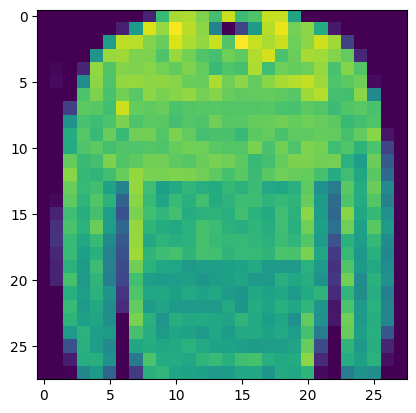

Pullover


In [19]:
import matplotlib.pyplot as plt
a=20
plt.imshow(x_train[a]);plt.show();print(class_name[y_train[a]])
plt.imshow(x_test[a]);plt.show();print(class_name[y_test[a]])

In [20]:
from keras import models
from keras import layers
model=models.Sequential()

model.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
model.add(layers.Dense(512, activation = 'relu',))
model.add(layers.Dense(10,activation='softmax',))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [21]:
x_train_1=x_train.reshape((60000,28*28))
x_train_1=x_train_1.astype('float32')/255
x_test_1=x_test.reshape(10000,28*28)
x_test_1=x_test_1.astype('float32')/255
print(x_test.shape)
print(x_train.shape)

(10000, 28, 28)
(60000, 28, 28)


In [22]:
from keras.utils import to_categorical
y_train_1=to_categorical(y_train)
y_test_1=to_categorical(y_test)
print(y_test_1.shape)
print(y_train_1.shape)

(10000, 10)
(60000, 10)


In [23]:
# Đào tạo mô hình với kích thước lô = 128, số lần lặp lại =100
import keras.metrics as metrics 
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train_1,y_train_1,epochs=100,batch_size=128)

Epoch 1/100
469/469 [==============================] - 10s 20ms/step - loss: 0.5449 - accuracy: 0.8007
Epoch 2/100
469/469 [==============================] - 8s 18ms/step - loss: 0.3744 - accuracy: 0.8616
Epoch 3/100
469/469 [==============================] - 11s 23ms/step - loss: 0.3329 - accuracy: 0.8755
Epoch 4/100
469/469 [==============================] - 9s 20ms/step - loss: 0.3051 - accuracy: 0.8861
Epoch 5/100
469/469 [==============================] - 9s 20ms/step - loss: 0.2856 - accuracy: 0.8930
Epoch 6/100
469/469 [==============================] - 9s 20ms/step - loss: 0.2671 - accuracy: 0.8985
Epoch 7/100
469/469 [==============================] - 9s 20ms/step - loss: 0.2553 - accuracy: 0.9033
Epoch 8/100
469/469 [==============================] - 8s 18ms/step - loss: 0.2450 - accuracy: 0.9070
Epoch 9/100
469/469 [==============================] - 10s 20ms/step - loss: 0.2334 - accuracy: 0.9124
Epoch 10/100
469/469 [==============================] - 9s 20ms/step - loss: 0.

In [24]:
model.save('ABC1.h5')
from keras.models import load_model
model2=load_model('ABC1.h5')

In [25]:
#đánh giá các mô hình trên dữ liệu thử nghiệm thông qua evaluate() :
test_loss,test_ace=model2.evaluate(x_test_1,y_test_1)
print('Test loss:',test_loss)
print('Test accuracy : ',test_ace)

313/313 [==============================] - 1s 4ms/step - loss: 1.3673 - accuracy: 0.8888
Test loss: 1.3672764301300049
Test accuracy :  0.8888000249862671


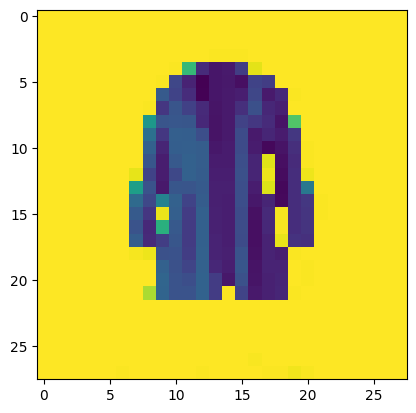

(28, 28, 1)
1/1 [==============================] - 0s 59ms/step
ket qua nhan dien: 8
Bag


In [27]:
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np
img=load_img('coat.webp',target_size=(28,28),grayscale=True)
plt.imshow(img)
plt.show()
img=img_to_array(img)
print(img.shape)
img=img.reshape(1,28*28)
img=img.astype('float32')
img=img/255
a=int(np.argmax(model2.predict(img),axis=1))
print('ket qua nhan dien:',a)
print(class_name[a])